# Data Wrangling

Data wrangling adalah proses mengubah data dari format awal menjadi format yang berguna untuk analisis.

Data yang digunakan adalah "Automobile Data Set" dari link berikut https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data.

In [1]:
import pandas as pd
import matplotlib.pylab as plt

In [2]:
filename = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

Nama kolom berupa python list disimpan dalam variabel `headers`

In [3]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

Gunakan method dari pandas `read_csv` untuk memuat data dari alamat web. Atur parameter `names` bernilai list header `headers`

In [4]:
df = pd.read_csv(filename, names = headers)

Gunakan method `head` untuk menampilkan 5 baris pertama

In [5]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Seperti yang dapat dilihat, ada beberapa tanda tanya di dataframe diatas; itu adalah _missing value_ yang mungkin bisa mengganggu hasil analisis kita.

__Bagaimana cara menghadapi missing data?__

1. Identifikasi/temukan missing data
2. Perbaiki missing data
3. Perbaiki format data

## Temukan dan atasi missing value

### Menemukan missing value

__Convert "?" ke NaN__

Pada dataset car diatas, missing data muncul dengan tanda tanya "?". Kita ubah "?" dengan `NaN` (Not a Number), yang mana adalah penanda missing value default untuk python, agar lebih mudah diolah dan lebih cepat secara komputasi. Disini kita gunakan fungsi `replace(A, B, inplace=True)` untuk mengganti `A` menjadi `B`.

In [6]:
import numpy as np

# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


#### Mengevaluasi Missing Data

Missing value sudah di-convert ke format default python. Kita sekarang gunakan fungsi untuk menemukan missing data:

1. `isnull()`
2. `notnull()`

Outputnya adalah nilai boolean yang menandakan nilai yang dimasukkan ke dalam fungsi itu adalah missing value atau bukan.

In [7]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


`True` berarti missing value, sementara `False` berarti bukan missing value.

#### Hitung jumlah missing value dalam setiap kolom

Dengan loop `for` di python, kita bisa dengan mudah menghitung jumlah missing value di setiap kolom. Sebagaimana yang disebutkan diatas, `True` merepresentasikan missing value, `False` berarti value nya ada di dataset (tidak hilang). Di isi for loopnya kita gunakan `value_counts()` untuk menghitung jumlah nilai `True`.

In [8]:
missing_data.columns.values.tolist()

['symboling',
 'normalized-losses',
 'make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-type',
 'num-of-cylinders',
 'engine-size',
 'fuel-system',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

In [9]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")    

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

Berdasarkan output diatas, setiap kolom punya 205 baris data, 7 kolom ada missing data nya:

1. `normalized-losses`: 41 missing data
2. `num-of-doors`: 2 missing data
3. `bore`: 4 missing data
4. `stroke`: 4 missing data
5. `horsepower`: 2 missing data
6. `peak-rpm`: 2 missing data
7. `price`: 4 missing data

### Perbaiki missing data

Bagaimana cara menghadapi missing data?

1. hapus (drop) data
    - hapus barisnya
    - hapus kolomnya
2. ganti data
    - ganti dengan rata-rata
    - ganti dengan frekuensi
    - ganti dengan fungsi lain

Seluruh kolom boleh dihapus hanya jika banyak terdapat missing value-nya. Pada dataset kita, gak ada kolom yang missing value-nya terlalu banyak buat dihapus sekalian. Kita bisa memilih metode mana untuk mengganti datanya; namun , ada metode yang mungkin lebih baik daripada yang lain. Kita akan menerapkan setiap metode ke kolom yang berbeda-beda:

__Ganti dengan rata-rata:__

- `normalized-losses`: 41 missing data, ganti dengan rata-rata
- `stroke`: 4 missing data, ganti dengan rata-rata
- `bore`: 4 missing data, ganti dengan rata-rata
- `horsepower`: 2 missing data, ganti dengan rata-rata
- `peak-rpm`: 2 missing data, ganti dengan rata-rata

__Ganti dengan frekuensi:__

- `num-of-doors`: 2 missing data, ganti dengan "four"

Karena 84% sedan punya 4 pintu. Maka karena 4 pintu yang paling banyak, kemungkinan besar akan bernilai "four"

__Hapus barisnya sekalian:__

- `price`: 4 missing data, hapus barisnya sekalian

Karena kolom `price` yang mau kita prediksi. Data entri apapun kalau tanpa ada `price` nya tidak bisa digunakan untuk prediksi; maka baris manapun tanpa data `price` tidak akan berguna untuk kita.

#### Hitung rata-rata nilai pada kolom

In [10]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


#### Ganti `NaN` dengan nilai rata-rata kolom `normalized-losses`

In [11]:
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

#### Hitung rata-rata untuk kolom `bore`

In [12]:
avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

Average of bore: 3.3297512437810957


#### Ganti `NaN` dengan nilai rata-rata

In [13]:
df["bore"].replace(np.nan, avg_bore, inplace=True)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Challenge #1: </h1>

<b>Sesuai dengan contoh diatas, ganti NaN di kolom "stroke" dengan rata-ratanya.</b>
</div>

In [ ]:
# ketik jawabannya dibawah


Double-click <b>here</b> for the solution.

<!-- The answer is below:

# calculate the mean vaule for "stroke" column
avg_stroke = df["stroke"].astype("float").mean(axis = 0)
print("Average of stroke:", avg_stroke)

# replace NaN by mean value in "stroke" column
df["stroke"].replace(np.nan, avg_stroke, inplace = True)

-->


#### Hitung rata-rata dari kolom 'horsepower':

In [17]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)

Average horsepower: 104.25615763546799


#### Ganti `NaN` dengan nilai rata-rata

In [18]:
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

#### Hitung rata-rata dari kolom 'peak-rpm'

In [19]:
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

Average peak rpm: 5125.369458128079


#### Ganti dengan nilai rata-rata

In [20]:
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

Untuk melihat jumlah setiap nilai pada kolom tertentu kita gunakan method `value_counts()`:

In [21]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

Kita bisa lihat bahwa pintu 4 (_four_) yang paling banyak. Kita juga bisa gunakan method `idxmax()` untuk mendapatkan nilai apa yang paling banyak:

In [22]:
df['num-of-doors'].value_counts().idxmax()

'four'

Ganti `NaN` dengan nilai "four"

In [23]:
#replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace=True)

Terakhir, hapus semua baris yang tidak punya data `price`

In [24]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [25]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Sekarang kita punya dataset tanpa missing values.

### Data format yang benar

Langkah terakhir dalam data cleaning adalah dengan memeriksa dan memastikan semua data dalam format yang benar (int, float, text, dll.). Di pandas kita bisa gunakan:

- `dtype()` untuk cek tipe data
- `astype()` untuk mengubah tipe data

#### List tipe data dari setiap kolom

In [26]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Bisa dilihat pada output diatas, beberapa kolom tipe data nya tidak benar. Variabel numerik harusnya bertipe _float_ atau _int_, dan variabel dengan _string_ seperti data kategorikal harusnya bertipe _object_. Contohnya variabel `bore` dan `stroke` adalah nilai numerik yang mendeskripsikan mesin nya, jadi harusnya tipenya kalau tidak _float_ berarti _int_; namun, disini muncul sebagai tipe _object_. Kita harus ubah tipe datanya menjadi yang seharusnya dengan method `astype()`.

#### Ubah tipe data ke format yang benar

In [27]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

#### List lagi kolomnya setelah perubahan

In [28]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

Sekarang kita punya dataset yang bersih tanpa missing value dan semua dalam format yang benar

## Data Standardization

Data biasanya di dapatkan dari berbagai lembaga yang berbeda dengan format yang berbeda

> Standarisasi data (data standardization) juga adalah istilah salah satu tipe dari normalisasi data, dimana kita kurangkan rata-ratanya dan bagi dengan standar deviasi

__Apa itu Standarisasi?__

Standarisasi adalah proses transformasi data menjadi format umum yang mana memungkinkan peneliti membuat perbandingan yang bermakna.

__Contoh__

Ubah mpg ke L/100km:

Dalam dataset, konsumsi bahan bakar pada kolom `city-mpg` dan `highway-mpg` memiliki satuan mpg (_miles per gallon_). Misal kita membuat aplikasi di negara yang menerima konsumsi bahan bakar dalam standar L/100km

Kita akan membutuhkan transformasi data dari mpg ke L/100km

Rumus untuk konversi satuan adalah

$$L/100km = 235/mpg$$

Kita bisa lakukan operasi matematika langsung di pandas.

In [29]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


In [30]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]

# check your transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Challenge #2: </h1>

<b>Berdasarkan contoh diatas, konversi <i>mpg</i> ke <i>L/100km</i> pada kolom "highway-mpg", dan ganti nama kolomnya atau buat kolom baru menjadi "highway-L/100km".</b>
</div>

In [31]:
# tulis jawabannya dibawah


Double-click <b>here</b> for the solution.

<!-- The answer is below:

# transform mpg to L/100km by mathematical operation (235 divided by mpg)
df["highway-mpg"] = 235/df["highway-mpg"]

# rename column name from "highway-mpg" to "highway-L/100km"
df.rename(columns={'"highway-mpg"':'highway-L/100km'}, inplace=True)

# check your transformed data 
df.head()

-->


## Data Normalization

### Mengapa normalisasi?

Normalisasi adalah proses mengubah nilai beberapa variabel menjadi rentang yang sama. Normalisasi yang umum termasuk penskalaan variabel sehingga rata-ratanya adalah 0, penskalaan variabel sehingga variansi nya 1, atau penskalaan variabel sehingga nilainya memiliki rentang 0 hingga 1

__Contoh__

Untuk mendemonstrasikan normalisasi, anggaplah kita mau mensklalakan kolom `length`, `width`, dan `height`

Targetnya adalah normalisasi variabel-variabel tersebut sehingga rentangnya menjadi 0 sampai 1. Pendekatan yang dilakukan adalah dengan mengganti nilai nya dengan $\frac{nilai\ original}{nilai\ maksimum}$

In [33]:
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

In [34]:
df['width'].std()

0.02918709470463726

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Challenge #3: </h1>

<b>Berdasarkan contoh diatas, normalisasikan kolom "height"</b>
</div>

In [35]:
# Write your code below and press Shift+Enter to execute 
df["height"] = df["height"]/df["height"].max()

Double-click <b>here</b> for the solution.

<!-- The answer is below:

df['height'] = df['height']/df['height'].max() 
# show the scaled columns
df[["length","width","height"]].head()

-->

Disini bisa kita lihat, kita sudah menormalisasikan `length`, `width`, dan `height` dengan rentang [0,1]

## Binning

Mengapa binning?

Binning adalah proses transformasi variabel numerik kontinu menjadi "bin" kategori diskrit, untuk analisis terkelompok.

__Contoh:__

Dalam dataset kita, `horsepower` adalah variabel bernilai bilangan real dengan rentang 48 hingga 288, memiliki 57 nilai unik. Bagaimana jika kita lebih peduli dengan perbedaan harga mobil antara horsepower tinggi, horsepower medium, dan horsepower rendah (3 tipe)?. Kita bisa menyusun ulangnya menjadi 3 bin untuk menyederhanakan analisis.

Kita akan menggunakan method pandas `cut` untuk membagi kolom `horsepower` menjadi 3 bin

### Contoh binning data di Pandas

Ubah data ke format yang sesuai

In [36]:
df["horsepower"]=df["horsepower"].astype(int, copy=True)

Kita buat histogram dari horsepower, untuk melihat distribusinya

Text(0.5, 1.0, 'horsepower bins')

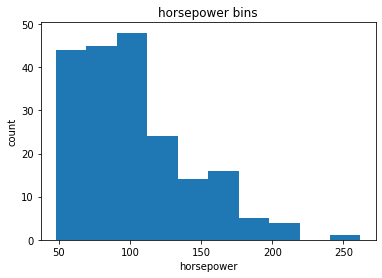

In [37]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Kita mau 3 bin dengan ukuran setara satu sama lain, maka kita gunakan fungsi numpy `linspace(start_value, end_value, numbers_generated`. Karena kita masukkan juga nilai minimum dari horsepower, set `start_value=min(df["horsepower"])`. Begitu juga untuk nilai maksimumnya, set `end_value=max(df["horsepower"])`. Lalu karena kita akan membuat 3 bin dengan panjang setara, maka seharusnya ada 4 pembagi, jadi `numbers_generated=4`.

Kita buat array bin, dengan nilai minimum, nilai maksimum, dan bandwidth yang kita hitung diatas. `bins` akan bernilai dimana satu elemen nilai akan menentukan akhri

In [38]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

Kita beri nama grupnya

In [39]:
group_names = ['Low', 'Medium', 'High']

Kita terapkan fungsi `cut` untuk menentukan di kelompok mana setiap nilai dari `df['horsepower']` berada

In [40]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


Lihat berapa jumlah mobil dalam setiap bin

In [41]:
df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Mari buat plot distribusi setiap bin

Text(0.5, 1.0, 'horsepower bins')

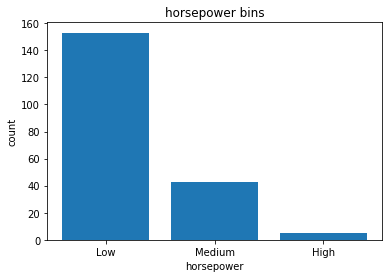

In [42]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Cek dataframe diatas kembali, lihat kolom terakhirnya yang berisi bin-bin dari `horsepower` dengan 3 kategori ("Low", "Medium", dan "High"). Kita berhasil mengurangi interval nya dari yang awalnya 57 menjadi 3!

### Visualisasi Bin

Biasanya, histogram yang digunakan untuk memvisualisasikan distribusi bin yang kita buat diatas.

Text(0.5, 1.0, 'horsepower bins')

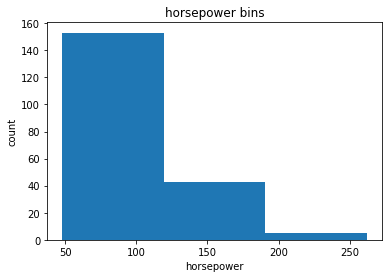

In [43]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

a = (0,1,2)

# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Grafik diatas menampilkan hasil binning untuk atribut `horsepower`.

## Variabel Indikator (atau variabel dummy)

__Apa itu variabel indikator?__

Variabel indikator (atau variabel dummy) adalah variabel numerik untuk melabeli kategori. Variabel ini disebut _'dummies'_ karena angkanya sendiri tidak memiliki makna.

__Mengapa menggunakan variabel indikator?__

Agar kita bisa menggunakan variabel kategorik untuk analisis regresi nanti.

__Contoh__

Kita lihat kolom `fuel-type` yang punya dua nilai unik, "gas" atau "diesel". Model regresi tidak dapat memahami kata-kata sebagai inputnya, hanya angka. Untuk menggunakan atribut ini dalam analisis regresi, kita ubah `fuel-type` menjadi indikator variabel.

Kita akan menggunakan method pandas `get_dummies` untuk memasukkan nilai numerik ke kategori `fuel-type` yang berbeda.

In [44]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'highway-L/100km',
       'horsepower-binned'],
      dtype='object')

Dapatkan variabel indikator dan masukkan ke dalam dataframe `dummy_variable_1`

In [45]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


Ganti nama kolom

In [46]:
dummy_variable_1.rename(columns={'fuel-type-diesel':'gas', 'fuel-type-diesel':'diesel'}, inplace=True)
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


Sekarang kita punya nilai 0 untuk merepresentasikan "gas" dan 1 untuk "diesel" dalam kolom `fuel-type`. Sekaran kita akan masukkan kolom ini ke dataset original.

In [47]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [48]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,11.190476,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,11.190476,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,9.791667,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,13.055556,Low,0,1


Dua kolom terakhir sekarang adalah representasi variabel `fuel-type` bernilai 0 dan 1.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Challenge #4: </h1>

<b>Seperti diatas, buat variabel indikator pada kolom "aspiration" dengan nilai "std" ke 0, dan "turbo" ke 1.</b>
</div>

In [ ]:
# ketik jawaban dibawah


Double-click <b>here</b> for the solution.

<!-- The answer is below:

# get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df['aspiration'])

# change column names for clarity
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

# show first 5 instances of data frame "dummy_variable_1"
dummy_variable_2.head()

-->

 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Challenge #5: </h1>

<b>Gabungin dataframe baru tadi ke dataframe original lalu hapus kolom "aspiration".</b>
</div>

In [1]:
# ketik jawaban dibawah


Double-click <b>here</b> for the solution.

<!-- The answer is below:

#merge the new dataframe to the original datafram
df = pd.concat([df, dummy_variable_2], axis=1)

# drop original column "aspiration" from "df"
df.drop('aspiration', axis = 1, inplace=True)

-->

Simpan dataframe yang sudah bersih ke format csv

In [58]:
df.to_csv('clean_df.csv')

<h1>Thank you for completing this notebook</h1>

<h3>About the Authors:</h3>

This notebook was written by <a href="https://www.linkedin.com/in/mahdi-noorian-58219234/" target="_blank">Mahdi Noorian PhD</a>, <a href="https://www.linkedin.com/in/joseph-s-50398b136/" target="_blank">Joseph Santarcangelo</a>, Bahare Talayian, Eric Xiao, Steven Dong, Parizad, Hima Vsudevan and <a href="https://www.linkedin.com/in/fiorellawever/" target="_blank">Fiorella Wenver</a> and <a href=" https://www.linkedin.com/in/yi-leng-yao-84451275/ " target="_blank" >Yi Yao</a>.

<p><a href="https://www.linkedin.com/in/joseph-s-50398b136/" target="_blank">Joseph Santarcangelo</a> is a Data Scientist at IBM, and holds a PhD in Electrical Engineering. His research focused on using Machine Learning, Signal Processing, and Computer Vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.</p>

<hr>
<p>Copyright &copy; 2018 IBM Developer Skills Network. This notebook and its source code are released under the terms of the <a href="https://cognitiveclass.ai/mit-license/">MIT License</a>.</p>